In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from pymongo import MongoClient
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg19 import VGG19  # 224x224 input
from tensorflow.keras.applications.inception_v3 import InceptionV3  # 299x299 input
from tensorflow.keras.applications.xception import Xception  # 224x224 input
from tensorflow.keras.applications.resnet50 import ResNet50  # 224x224 input
from src.model import Model
from src.mtg_df_prep import load_color_data
from src.helpers import generate_flow_df, plot_conf_matrix


In [7]:
m = Xception(include_top=False, weights='imagenet')

In [8]:
m.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [2]:
# Connect database
client = MongoClient('192.168.0.209', 27017)
db = client['capstone_3']
model_db = db['models']

In [3]:
# Model params
model_dir = 'data/models'
img_dir = '/home/jovyan/data/art/'
target_size = (224, 224)
batch_size = 16
test_size = 0.2
epochs = 5

In [4]:
# Load & filter data
cards = load_color_data(mono=True)
df = cards[cards.set_type.isin(['starter', 'core'])]
# df = cards[cards.set.isin(['7ed', '8ed', '9ed', 'm10', 'm12'])]

In [5]:
for doc in model_db.find({}):
    print(doc['note'])
    print(doc['eval_score'])


baseline, sets trained: ['7ed' 'm12' '9ed' '8ed' 'm10']
{'test_loss': 1.5289782285690308, 'test_accuracy': 0.3813559412956238}
3x conv layers, sets trained: ['7ed' 'm12' '9ed' '8ed' 'm10']
{'test_loss': 2.0196895599365234, 'test_accuracy': 0.2711864411830902}
3x conv layers + extra dropout, sets trained: ['7ed' 'm12' '9ed' '8ed' 'm10']
{'test_loss': 2.016291618347168, 'test_accuracy': 0.3050847351551056}
baseline, sets trained: ['7ed' 'm12' '9ed' '8ed' 'm10']
{'test_loss': 1.9271360635757446, 'test_accuracy': 0.29661017656326294}
3x conv layers, sets trained: ['7ed' 'm12' '9ed' '8ed' 'm10']
{'test_loss': 1.7093298435211182, 'test_accuracy': 0.27966102957725525}
3x conv layers + extra dropout, sets trained: ['7ed' 'm12' '9ed' '8ed' 'm10']
{'test_loss': 1.7131867408752441, 'test_accuracy': 0.3813559412956238}
baseline, sets trained: ['m21' 'm19' 'p02' '7ed' 'm13' 'por' 'ori' 'ptk' '10e' '5ed' 'm12' 'm20'
 'm15' 'm11' '9ed' '8ed' 'leb' 'm10' 'lea' 'm14' 'itp' 'oana' 's99' 'cp1'
 'ppod' 'a

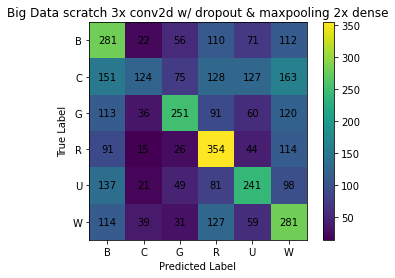

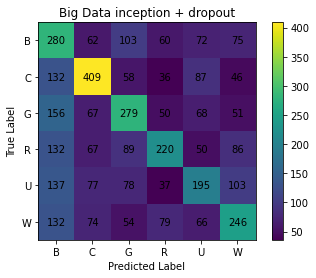

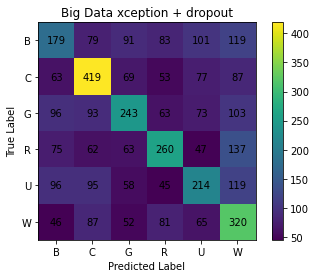

In [6]:

for doc in model_db.find({}):
    if 'Big Data' in doc['note']:
        fig, ax = plt.subplots()
        df = pd.DataFrame.from_dict(doc['holdout_prediction'])
        p, t = df.prediction, df.true
        ax.set_title(doc['note'].split(', sets')[0])
        plot_conf_matrix(t, p, labels=doc['class_indices'].keys(), ax=ax)

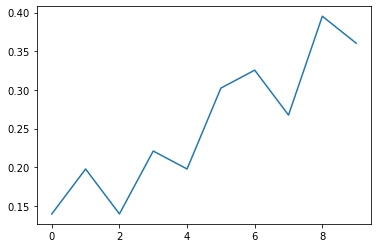

In [13]:
fig, ax = plt.subplots()
ax.plot(history.epoch, history.history['accuracy'])
plt.show()

In [14]:
filenames = test_gen.filenames
predict = model.predict(test_gen, steps=len(filenames))
pred = predict.argmax(axis=1)
true = test_gen.labels

In [15]:
predict.argmax(axis=1)

array([1, 3, 1, 3, 1, 2, 4, 2, 5, 4, 2, 2, 1, 1, 4, 3, 2, 4, 3, 3, 2, 2,
       3, 5, 4, 5, 3, 2, 2, 2])

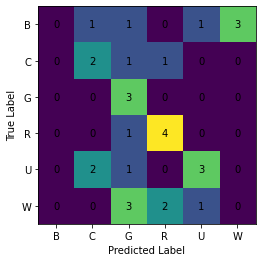

In [16]:
plot_conf_matrix(true, pred, labels=train_gen.class_indices.keys())

In [17]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,3.769302,0.139535,1.889700,0.1875
1,1.873561,0.197674,1.879622,0.1875
2,1.875948,0.139535,1.876541,0.0625
3,1.863034,0.220930,1.614805,0.4375
4,1.875925,0.197674,1.801388,0.2500
5,1.774323,0.302326,1.762046,0.2500
6,1.755087,0.325581,1.769518,0.3125
7,1.683631,0.267442,1.842761,0.1875
8,1.673284,0.395349,1.611878,0.3125
9,1.639078,0.360465,1.432761,0.5625
